## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2019.

## Assignment 2 - Task 1: Optimization

In this task, we introduce several improved stochastic gradient descent (SGD) based optimization methods. Plain/naive SGD is a reasonable method to update neural network parameters. However, to make SGD perform well, one would need to find an appropriate learning rate and a good initial value. Otherwise, the network will get stuck if the learning rate is small, or it will diverge if the learning rate is too large. In reality, since we have no prior knowledge about the training data, it is not trivial to find a good learning rate manually. Also, when the network becomes deeper, for each layer one may need to set a different learning rate. Another common problem is the lack of sufficient training data. This can cause the training to get stuck when using the naive SGD method. These are the limitations of the plain SGD, which are motivators for creating and using improved SGD-based methods. 

To address the question of **how to set a good learning rate?**, one can rely on adaptive learning rate methods.  Here, you are going to experiment with **SGD with momentum**, **RMSProp**, **Adam** and compare them.
All of these optimizers are adaptive learning rate methods. Here are a few useful links: http://ruder.io/optimizing-gradient-descent/.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Import modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from utils.cifar_utils import load_data


C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorf

## Load CIFAR 10

Here we use a small dataset with only 2500 samples to simulate the "lack-of-data" situation.

In [2]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()
X_val = X_train[:500,:]
y_val = y_train[:500]
X_train = X_train[500:2500,:]
y_train = y_train[500:2500]

mean_image = np.mean(X_train, axis=0).astype(np.float32)
X_train = X_train.astype(np.float32) - mean_image
X_val = X_val.astype(np.float32) - mean_image

# We have vectorized the data for you. That is, we flatten the 32×32×3 images into 1×3072 Numpy arrays.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
Training data shape:  (2000, 3072)
Training labels shape:  (2000,)
Validation data shape:  (500, 3072)
Validation labels shape:  (500,)


## Part 1: Implement Optimizers

Here we provide an MLP code snippet for testing.

In [3]:
from utils.neuralnets.mlp import MLP

### Original SGD with learning rate decay (for comparison purpose only)


In [4]:
from utils.optimizers import SGDOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, weight_scale=1e-3, l2_reg=0.0)
optimizer = SGDOptim()
hist_sgd = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=30, batch_size=200, learning_rate=1e-2, learning_decay=0.95, 
                           verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.146, new learning rate = 0.0095
epoch 2: valid acc = 0.146, new learning rate = 0.009025
epoch 3: valid acc = 0.146, new learning rate = 0.00857375
epoch 4: valid acc = 0.152, new learning rate = 0.0081450625
epoch 5: valid acc = 0.152, new learning rate = 0.007737809374999999
epoch 6: valid acc = 0.152, new learning rate = 0.007350918906249998
epoch 7: valid acc = 0.162, new learning rate = 0.006983372960937498
epoch 8: valid acc = 0.172, new learning rate = 0.006634204312890623
epoch 9: valid acc = 0.188, new learning rate = 0.006302494097246091
epoch 10: valid acc = 0.182, new learning rate = 0.005987369392383786
epoch 11: valid acc = 0.184, new learning rate = 0.005688000922764597
epoch 12: valid acc = 0.174, new learning rate = 0.005403600876626367
epoch 13: valid acc = 0.17, new learning rate = 0.005133420832795048
epoch 14: valid acc = 0.174, new learning rate = 0.0048767497911552955
epoch 15: valid acc = 0.168, new learn

### SGD + Momentum

<span style="color:red">__TODO:__</span> Edit **SGDmomentumOptim** in __./utils/optimizers.py__


In [5]:
from utils.optimizers import SGDmomentumOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = SGDmomentumOptim(model, momentum=0.8)
hist_sgd_momentum = optimizer.train(model, X_train, y_train, X_val, y_val, 
                                         num_epoch=30, batch_size=200, learning_rate=1e-2, 
                                         learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.15, new learning rate = 0.0095
epoch 2: valid acc = 0.18, new learning rate = 0.009025
epoch 3: valid acc = 0.174, new learning rate = 0.00857375
epoch 4: valid acc = 0.178, new learning rate = 0.0081450625
epoch 5: valid acc = 0.234, new learning rate = 0.007737809374999999
epoch 6: valid acc = 0.232, new learning rate = 0.007350918906249998
epoch 7: valid acc = 0.248, new learning rate = 0.006983372960937498
epoch 8: valid acc = 0.252, new learning rate = 0.006634204312890623
epoch 9: valid acc = 0.284, new learning rate = 0.006302494097246091
epoch 10: valid acc = 0.312, new learning rate = 0.005987369392383786
epoch 11: valid acc = 0.322, new learning rate = 0.005688000922764597
epoch 12: valid acc = 0.328, new learning rate = 0.005403600876626367
epoch 13: valid acc = 0.308, new learning rate = 0.005133420832795048
epoch 14: valid acc = 0.348, new learning rate = 0.0048767497911552955
epoch 15: valid acc = 0.332, new learni

### RMSprop

<span style="color:red">__TODO:__</span> Edit **RMSpropOptim** in ./utils/optimizers.py

In [6]:
from utils.optimizers import RMSpropOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = RMSpropOptim(model)
hist_rmsprop = optimizer.train(model, X_train, y_train, X_val, y_val, 
                               num_epoch=30, batch_size=200, learning_rate=1e-3, 
                               learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.194, new learning rate = 0.00095
epoch 2: valid acc = 0.212, new learning rate = 0.0009025
epoch 3: valid acc = 0.292, new learning rate = 0.000857375
epoch 4: valid acc = 0.25, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.31, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.304, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.34, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.348, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.346, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.366, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.358, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.366, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.35, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.376, new learning rate = 0.00048767497911552944
epoch 15: valid acc 

### Adam

<span style="color:red">__TODO:__</span> Edit **AdamOptim** in ./utils/optimizers.py

In [7]:
from utils.optimizers import AdamOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = AdamOptim(model)
hist_adam = optimizer.train(model, X_train, y_train, X_val, y_val, 
                            num_epoch=30, batch_size=200, learning_rate=1e-3, 
                            learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.168, new learning rate = 0.00095
epoch 2: valid acc = 0.16, new learning rate = 0.0009025
epoch 3: valid acc = 0.218, new learning rate = 0.000857375
epoch 4: valid acc = 0.196, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.248, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.254, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.246, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.258, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.248, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.26, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.268, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.258, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.262, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.292, new learning rate = 0.00048767497911552944
epoch 15: valid ac

## Part 2: Comparison

<span style="color:red">__TODO:__</span> Run the following cells, which plot the loss curves of different optimizers. 

In [8]:
loss_hist_sgd, train_acc_hist_sgd, val_acc_hist_sgd = hist_sgd
loss_hist_momentum, train_acc_hist_momentum, val_acc_hist_momentum = hist_sgd_momentum
loss_hist_rmsprop, train_acc_hist_rmsprop, val_acc_hist_rmsprop = hist_rmsprop
loss_hist_adam, train_acc_hist_adam, val_acc_hist_adam = hist_adam

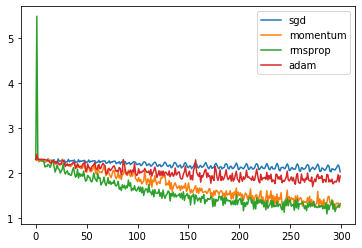

In [9]:
# Plot training error curve of optimizers
plt.plot(loss_hist_sgd, label="sgd")
plt.plot(loss_hist_momentum, label="momentum")
plt.plot(loss_hist_rmsprop, label="rmsprop")
plt.plot(loss_hist_adam, label="adam")
plt.legend()
plt.show()

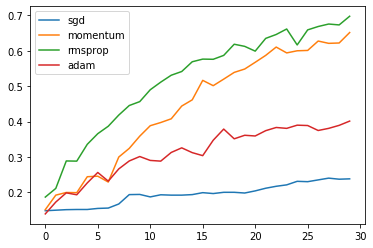

In [10]:
# Plot training accuracy curve of optimizers
plt.plot(train_acc_hist_sgd, label="sgd")
plt.plot(train_acc_hist_momentum, label="momentum")
plt.plot(train_acc_hist_rmsprop, label="rmsprop")
plt.plot(train_acc_hist_adam, label="adam")
plt.legend()
plt.show()

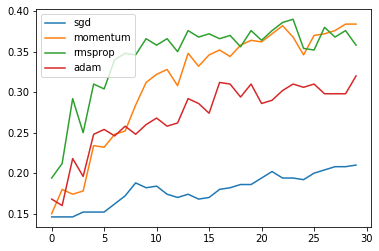

In [11]:
# Plot validation accuracy curve of optimizers
plt.plot(val_acc_hist_sgd, label="sgd")
plt.plot(val_acc_hist_momentum, label="momentum")
plt.plot(val_acc_hist_rmsprop, label="rmsprop")
plt.plot(val_acc_hist_adam, label="adam")
plt.legend()
plt.show()

<span style="color:red">__TODO:__</span> Describe your results, and discuss your understandings of these optimizers, such as their advantages/disadvantages and when to use them.

Answer: As can be seen, SGD is by far the worst performer of that group. We can see that msprop and momentum have similar performance. However, Adam laggs behind a little, but is expected to pick up later.

SGD can be used when the batch size is huge or when the new datasets are coming in one at a time. Since SGD updates one step at time, it is very useful in such situations.SGD can jump to better local minima and thus can be helpful.

Momentum takes into consideration the the gradients of the previous iterations too. Thus the new calculated gradient adds a small component to the accumulated gradient and the algorithm takes a big leap in the direction of the accumulated direction. Thus, the variation or anamoly of a new iteration will not affect the direction of the gradient much. Further, momentum can get to local minimas quickly.

RMSprop uses the entire batch to figure out the grads in each direction. It also uses average of older gradients to calculate the new gradient. Thus it can be very good where there are saddle points in the data. 

Adam is a combination of momentum and RMSprop. Thus it can act well in both conditions, as in it makes a large leap in the direction of the accumulated gradients, but also considers fluctuations along different features
